---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'> Week 3 Lab Exercises: **Dataset splitting & Pre-Processing**</font></div>
---

# Introduction

Last week we learned how to read the data and do exploratory data analysis (EDA). The next step in a typical machine learning pipeline is to split data and transform so that we can feed the data to a learning algorithm. 

The lab assumes that you have completed ``Week 02 lab: Reading data & Exploratory Data Analysis (EDA)``. If you havent yet, please do so before attempting this lab. 

The lab can be executed on either your own machine (with anaconda installation) or on AWS educate classroom setup for the course. 
- Please refer canvas for instructions on installing anaconda python or setting up AWS Sagemaker notebook: [Introduction to Amazon Web Services (AWS) Classrooms](https://rmit.instructure.com/courses/79534/pages/introduction-to-amazon-web-services-aws-classrooms?module_item_id=2952364)


## Objective
- Continue to familiarise with Python and other ML packages
- Learn to split the data to training/validation and test sets
- Important considetations in splitting the data
- Learn to transform (pre process) data: data encoding and normalization. 


## Dataset

We examine two regression based datasets in this lab. The first one is to do with house prices, some factors
associated with the prices and trying to predict house prices. The second dataset is predicting the amount of
share bikes hired every day in Washington D.C., USA, based on time of the year, day of the week and weather
factors. These datasets are available in `housing.data.csv` and `bikeShareDay.csv` in the code repository. 

First, ensure the two data files are located within the Jupyter workspace. 
- If you are on the local machine copy the two data data directories (`BostonHousingPrice`,`Bike-Sharing-Dataset`) to your current folder.
- If you are on AWS you can upload the data to the notebook instance by clicking the `upload files` icon on the left sidebar.

In this course we mostly use datasets that are collected by a third party. If you are interested in collecting your own data for your project, some useful information can be found at: [Introduction to Constructing Your Dataset](https://developers.google.com/machine-learning/data-prep/construct/construct-intro) 

# Data Splitting

As we have discussed in the lecture, in supervised learning we are interested in learning a model using our dataset that can predict the target value for unseen data (Not in the training set). This is called **generalization**. How can we test if the model we developed with our training data would generalize? One approach we can use is to **hold some data from the training process** (Hypothetical unseen data). This hold out data subset (split) is called the `"Test set"` and the remaining data is called the `”Training set"`. The training set may be further subdivided, but more on this later in the regularization lecture. We can use the "Test set" at the end of the development phase to test our model and see if it generalizes.  

- **Training set:** Is applied to train, or fit, your model. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.
- **Test set:** Needed for an unbiased evaluation of the final model.


> **<span style="font-size:1.5em;">⚠</span> Warning: The test set should be independent and identically distributed with respect to the training data**  
> - Should make sure that there is no leakage between the two sets (overlapped train and test instances). This will give unrealistically high performance metric values for your model. e.g. In house price prediction, there may be a house that was sold multiple times and, you might include some instances of this house in the train set and some in the test set. This will result in data leakage.  
> - There should be no underlying differences between the two distributions. In other words the characteristics of the test set should not be different to that of the train set. For example all the houses sold in winter in train set and all the houses sold on summer in another set (generally, there is a difference in house prices sold in winter vs summer).
> - More on this in the lectures. 

> **<span style="font-size:1.5em;">⚠</span> Warning: The test data should NOT be used for any aspect of the model development process (training).**  
> This includes hyper parameter tuning and model selection (a separate validation set should be used for them).  

## Random splitting
In machine learning, the most common approach taken to split the dataset in to do random sampling (random split). In random sampling we allocate some data instances (selected randomly) to train set and the other instances to test set.  One key configuration parameter in this process: what should be the size of the train set and test set respectively.  This is most commonly expressed as a percentage between 0 and 1 for either the train or test datasets. For example, a training set with the size of 0.67 (67 percent) means that the remainder percentage 0.33 (33 percent) is assigned to the test set.

There is no optimal split percentage.

You must choose a split percentage that meets your project’s objectives with considerations that include:

- Computational cost in training/evaluation the model.
- Training set/Test set representativeness.

Nevertheless, common split percentages include:

- Train: 80%, Test: 20%
- Train: 67%, Test: 33%
- Train: 50%, Test: 50%

Lets first load the house price dataset.  
<span style="font-size:1.5em;">�</span>Use the knowledge from the last week to load the dataset into a pandas dataframe named `bostonHouseFrame`.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## TODO
bostonHouseFrame = pd.read_csv('./BostonHousingPrice/housing.data.csv', delimiter='\s+')
bostonHouseFrame.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


The scikit-learn Python machine learning library provides an implementation of the train-test splitting via function `train_test_split()`. Lets use this to randomly split our data to 80% train set and 20% test set.

In [24]:
from sklearn.model_selection import train_test_split

with pd.option_context('mode.chained_assignment', None):
    bostonHouseTrainFrame, bostonHouseTestFrame = train_test_split(bostonHouseFrame, test_size=0.2, shuffle=True)


In [25]:
print("Nunber of instances in the original dataset is {}. After spliting Train has {} instances and test has {} instances."
      .format(bostonHouseFrame.shape[0], bostonHouseTrainFrame.shape[0], bostonHouseTestFrame.shape[0]))

Nunber of instances in the original dataset is 506. After spliting Train has 404 instances and test has 102 instances.


## Checking your splits
As discussed, random splitting may lead to leakage (two splits are not independent). We need to understand the dataset to make sure there are no hidden sources of leakage in the data. This is one place we can use the knowledge we gained through the EDA.

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Use the EDA observations from last week to see if there is any issue with the random splitting process.</font>**  

We can use histogram plots to see if the two partitions (splits) are identically distributed. 

<span style="font-size:1.5em;">�</span> Use the knowledge from last week to plot the histograms for each attribute for the two splits. Use different colors for test vs train

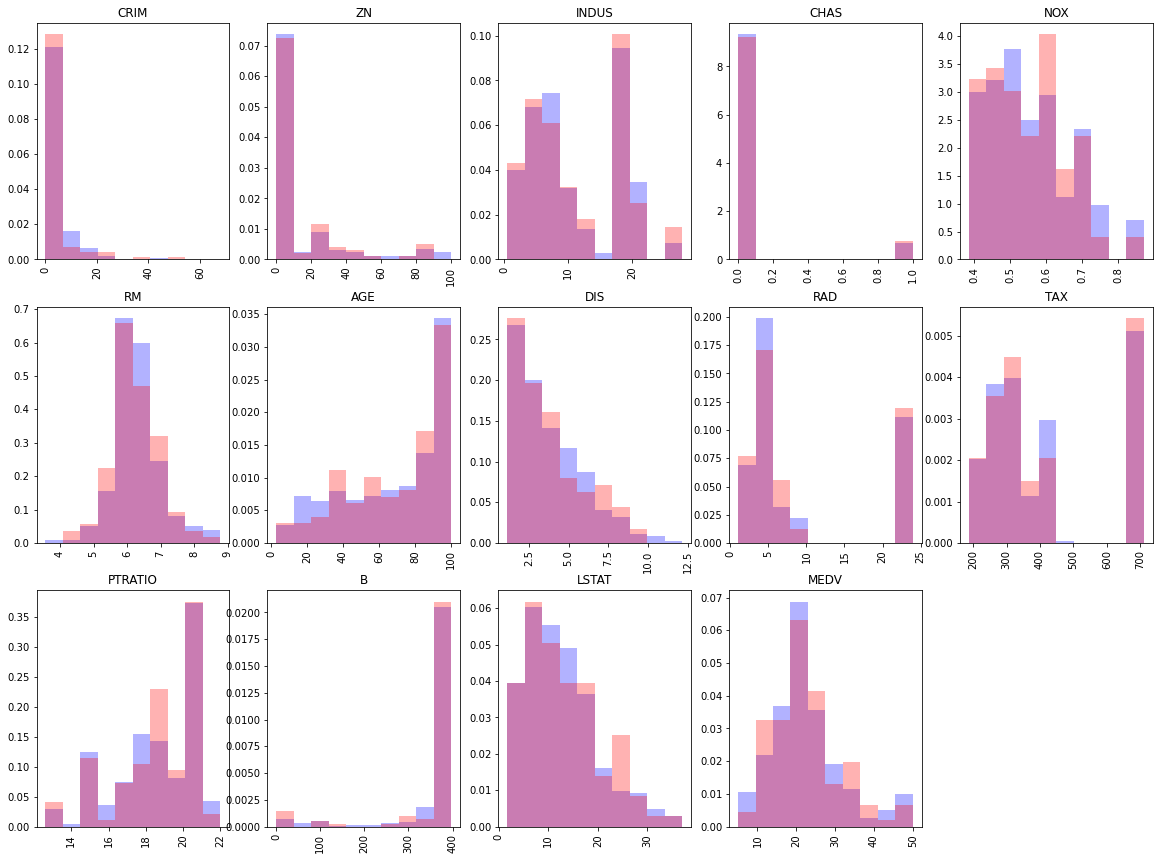

In [26]:
## TODO

plt.figure(figsize=(20,20))
for i, col in enumerate(bostonHouseTrainFrame.columns):
    plt.subplot(4,5,i+1)
    _, bins, _ = plt.hist(bostonHouseTrainFrame[col], alpha=0.3, color='b', density=True)
    plt.hist(bostonHouseTestFrame[col], bins=bins, alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - The distribution of train set attributes is approximately equal to the distribution of test set attributes. 


> <span style="font-size:1.5em;">⚠</span> **Warning: Make sure you use the same bins for both plots (test/train)** 

Now you know how to randomly split the data. Random splitting is not the only method to split data. The method used may vary based on many factors like problem type, nature of data etc. For example if we have time series data, we can use [TimeSeriesSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html). It is also common in ML to write your own custom function to do data splitting where special measures are required to keep the data independent or identical. 

# Data Pre-processing (or Transforming)

The data you read from a CSV file or dataset may not be of the form that is suitable for ML algorithms. Therefore it is common to perform some preprocessing of the data that is read in before using them in the modelling process. Usually data pre processing involves several distinct steps:

1. Cleaning data & Removing/filling missing values.
2. Encoding data
3. Feature scaling

Since we have not covered the necessary theoretical details to handle missing values, we will postpone that step for later and concentrate on the other two elements. 


## Feature Scaling

In a typical dataset, you might have different numerical features with widely different ranges. For example during the EDA we discovered that the attribute NOX takes values in the range `[0,1]` whereas TAX takes values in the range `[0, 700]`. Furthermore, you may have some features that have a [skewed distribution](https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/). Such characteristics in data may sometimes cause problems for the learning algorithms (specially gradient based methods and distance based methods). Therefore it is common to use feature scaling.

> **<span style="font-size:1.5em;">⚠</span> Important: Feature scaling, is usually guided by the EDA.**  
> The histograms and other individual feature visualizations often provided useful information for feature scaling and can be used to justify one approach over another. 

Two most common methods employed for feature normalization are min-max scaling and standard scaling

 - **Min-max scaling:** An individual feature is transformed so that the values are mapped to the range `[0,1]`. [Ref](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler).
 - **Standard scaling:** An individual feature is transformed so that the transformed values have zero mean and unit variance. [Ref](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

Lets apply the above two methods to the feature `RM` in boston house price dataset.

In [27]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

MinMaxScaler_RM = MinMaxScaler().fit(bostonHouseTrainFrame[['RM']])
RM_minmax = MinMaxScaler_RM.transform(bostonHouseTrainFrame[['RM']])

StandardScaler_RM = StandardScaler().fit(bostonHouseTrainFrame[['RM']])
RM_standard = StandardScaler_RM.transform(bostonHouseTrainFrame[['RM']])

Now lets plot the feature distribution before and after to see the difference

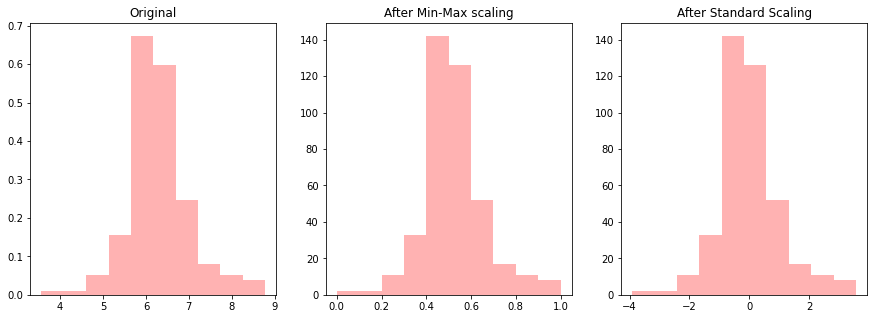

In [28]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.hist(bostonHouseTrainFrame['RM'], alpha=0.3, color='r', density=True)
plt.title("Original")

plt.subplot(1,3,2)
plt.hist(RM_minmax, alpha=0.3, color='r')
plt.title("After Min-Max scaling")

plt.subplot(1,3,3)
plt.hist(RM_standard, alpha=0.3, color='r')
plt.title("After Standard Scaling")
plt.show()

<span style="font-size:1.5em;">�</span> What observations did you make?

> <span style="font-size:1em;">✔</span> **Observations:** 
> - Both scaling methods do not change the shape of the feature distribution. They only change the range. 

lets go with min-max scaling.

In [29]:
# Apply the tranformation to train data and save in the dataframe
bostonHouseTrainFrame['RM'] = MinMaxScaler_RM.transform(bostonHouseTrainFrame[['RM']])

# Apply the tranformation to train data and save in the dataframe
bostonHouseTestFrame['RM'] = MinMaxScaler_RM.transform(bostonHouseTestFrame[['RM']])


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


> **<span style="font-size:1.5em;">⚠</span> Warning: When normalizing, ensure that the same scaling parameters are applied to all splits (train/test/validation).**  
> A common mistake is to use one set of scaling parameters to do the normalization of train data and another on test data. This happens if you apply `fit_transform()` function twice: ones to train set and again for test data.  
> The correct approach would be to do the fit() on train data and then apply the transform() to train set and test set separately, to scale the data. 

We can also use non linear transformation to map a feature that has a skewed distribution to have a distribution that is close to a gaussian. 

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Read this article on [skewed distribution](https://www.statisticshowto.com/probability-and-statistics/skewed-distribution/).</font>**  

Lets try a non-linear transformation with attribute `DIS`

Text(0.5, 1.0, 'Power scaling')

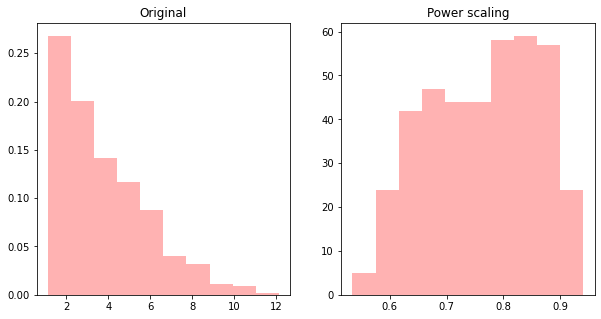

In [30]:
from sklearn.preprocessing import PowerTransformer

PowerTransformer_CRIM = PowerTransformer(method='yeo-johnson', standardize=False).fit(bostonHouseTrainFrame[['CRIM']])
RM_power = PowerTransformer_CRIM.transform(bostonHouseTrainFrame[['DIS']])

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(bostonHouseTrainFrame['DIS'], alpha=0.3, color='r', density=True)
plt.title("Original")

plt.subplot(1,2,2)
plt.hist(RM_power, alpha=0.3, color='r')
plt.title("Power scaling")

In [31]:
bostonHouseTrainFrame['DIS'] = PowerTransformer_CRIM.transform(bostonHouseTrainFrame[['DIS']])
bostonHouseTestFrame['DIS'] = PowerTransformer_CRIM.transform(bostonHouseTestFrame[['DIS']])

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Select the appropriate feature scaling method for all numerical attributes in the boston house dataset.</font>**  

There are many other normalization techniques you can try. See [scikit-learn preprocessing documentation](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) for more information. 

There are also methods that can handle outliers. See [Compare the effect of different scalers on data with outliers](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py).

## Encoding Categorical data

So far we look at how to pre-process numerical data. What about categorical data? As we discussed last week, categorical data can come in two forms:

Categorical Variables: These are data points that take on a finite number of values, AND whose values do not have a numerical interpretation.

- Ordinal categorical variables take on values which can be logically ordered. For example, the reviews for a product which are given as 0-5 stars. 

- Nominal categorical variables cannot be put in any logical order. Examples of this would be the gender, race, etc.


There is only one categorical attribute in the boston house price dataset (`CHAS`). This attribute is already pre-processed and stored as a binary variable (0,1). Therefore no further preprocessing is required. To learn about the encoding process we will now switch to the Bike share dataset. 

Load the bike share dataset and examine the attributes. 

In [32]:
## TODO
bikeShareFrame = pd.read_csv('./Bike-Sharing-Dataset/bikeShareDay.csv', delimiter=',')
bikeShareFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<span style="font-size:1.5em;">�</span> What are the `Ordinal categorical variables` and `Nominal categorical variables`?

For Ordinal categorical variables, each category can be represented as an integer. This process is called label encoding. Label encoding is simply converting each value in a column to a number. 

Lets take the attribute `weathersit` which explains the weather situation. This attribute can take four values:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

*Note: The data set does not contain rows with value 4*

This is a variable that cannot be put in any logical order (one might argue it can be, but for this lab lets go with the above assumption). You can represent categorical values as numbers, but you won't be able to compare these numbers or subtract them from each other. For example, the value of 0 is obviously less than the value of 4 but does that really correspond to the data set in real life? Does a heavy rain has “4X” more weight in our calculation than the clear?

What can we do to rectify this issue?

A common approach is called one hot encoding. The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly but does have the downside of adding more columns to the data set.

In [33]:
from sklearn.preprocessing import OneHotEncoder

OneHotEncoder_weathersit = OneHotEncoder(handle_unknown='ignore')
OneHotEncoder_weathersit.fit(bikeShareFrame[['weathersit']])

onehot_ = OneHotEncoder_weathersit.transform(bikeShareFrame[['weathersit']]).toarray()

print(onehot_.shape, OneHotEncoder_weathersit.categories_)

(731, 3) [array([1, 2, 3])]


We can see that the `weathersit` column is now converted to 3 columns. The first column will say if the day is "Clear, Few clouds, Partly cloudy, Partly cloudy" or not, and so on. 

Now we can put these columns back to the dataframe.

In [34]:
colName = 'weathersit'
for i in range(len(OneHotEncoder_weathersit.categories_[0])):
    bikeShareFrame[colName + '_' + str(OneHotEncoder_weathersit.categories_[0][i])] = onehot_[:,i]

    
bikeShareFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0.0,1.0,0.0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0.0,1.0,0.0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.0,0.0,0.0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.0,0.0,0.0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1.0,0.0,0.0


Now we have three extra columns. compare them with the original 'weathersit' column as see if it matches.

Since we have represented the 'weathersit' column with the three new columns, we should remove the original column to eliminate redundancy.

In [35]:
bikeShareFrame = bikeShareFrame.drop(['weathersit'], axis=1)
bikeShareFrame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,1,0,1,0,6,0,0.344167,0.363625,0.805833,0.160446,331,654,985,0.0,1.0,0.0
1,2,2011-01-02,1,0,1,0,0,0,0.363478,0.353739,0.696087,0.248539,131,670,801,0.0,1.0,0.0
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1.0,0.0,0.0
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1.0,0.0,0.0
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1.0,0.0,0.0


There are even more advanced algorithms for categorical encoding. [This](http://www.willmcginnis.com/2015/11/29/beyond-one-hot-an-exploration-of-categorical-variables/) article provides some additional technical background and comparisons. A good explanation of the other methods are given in [here](https://stats.idre.ucla.edu/r/library/r-library-contrast-coding-systems-for-categorical-variables/#backward). however the code is in R.  

# Exercise: Analyse the Bike Share Data

> **<font color='red'><span style="font-size:1.5em;">☞</span> Task: Do the splitting and numerical feature scaling on the Bike Share Data.</font>**  
> Now you seen how to do this task for the house price dataset. Repeat the same process for the Daily
Bike Share rental data.

> Answer the following questions and discuss this with your lab demonstrator. Please do attempt this, and don’t wait to see if solutions are released (they will not be!)
> - how to avoid leakage in the dataset?
> - What type of normalization should be used for each attribute?
